Columns in the DataFrame:
Index(['id', 'km4week', 'sp4week', 'MarathonTime', 'Marathon_Prague17',
       'Name_????? ?????', 'Name_Ale? Kuchynka', 'Name_Andrej Madliak',
       'Name_Barry Sacher', 'Name_Blair MORGAN',
       ...
       'Wall21_1.93', 'Wall21_1.94', 'Wall21_1.97', 'Wall21_1.98',
       'Wall21_2.02', 'Wall21_2.05', 'CATEGORY_A', 'CATEGORY_B', 'CATEGORY_C',
       'CATEGORY_D'],
      dtype='object', length=160)
         id   km4week   sp4week  MarathonTime  Marathon_Prague17  \
0 -1.712255  2.628775 -0.105867     -2.532564                1.0   
1 -1.672435  0.233311 -0.106509     -1.945507                1.0   
2 -1.632616  0.759417 -0.106639     -1.758716                1.0   
3 -1.592796  2.804144 -0.107704     -1.705347                1.0   
4 -1.552976  0.830311 -0.106280     -1.545241                1.0   

   Name_????? ?????  Name_Ale? Kuchynka  Name_Andrej Madliak  \
0               0.0                 0.0                  0.0   
1               0.0            

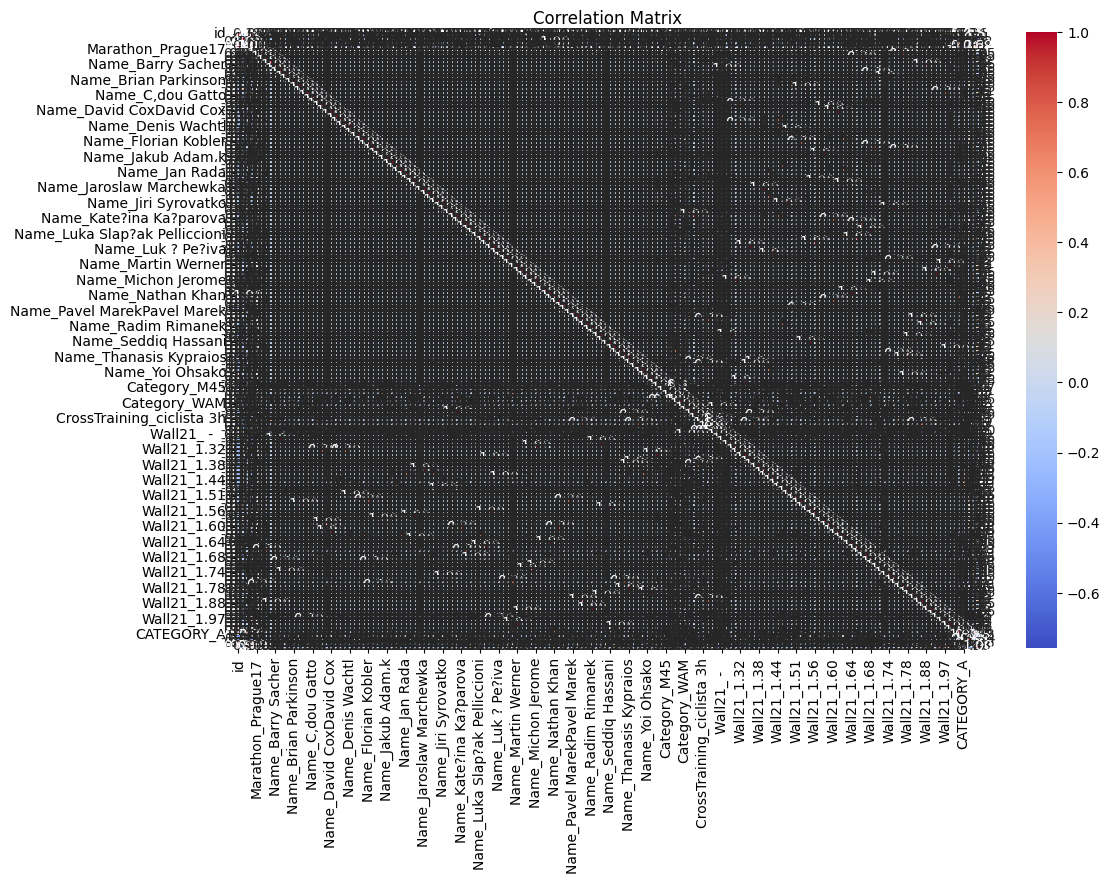

Column 'weekly_mileage' not found in the DataFrame.
Column 'average_pace' not found in the DataFrame.
Column 'longest_run_distance' not found in the DataFrame.
Column 'total_distance' not found for calculating 'pace_per_mile'.
Columns 'average_pace' or 'rest_days' not found for calculating 'training_intensity'.
         id   km4week   sp4week  MarathonTime  Marathon_Prague17  \
0 -1.712255  2.628775 -0.105867     -2.532564                1.0   
1 -1.672435  0.233311 -0.106509     -1.945507                1.0   
2 -1.632616  0.759417 -0.106639     -1.758716                1.0   
3 -1.592796  2.804144 -0.107704     -1.705347                1.0   
4 -1.552976  0.830311 -0.106280     -1.545241                1.0   

   Name_????? ?????  Name_Ale? Kuchynka  Name_Andrej Madliak  \
0               0.0                 0.0                  0.0   
1               0.0                 0.0                  0.0   
2               0.0                 0.0                  0.0   
3               0.0   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
file_path = '../data/preprocessed_marathon_data.csv'
df = pd.read_csv(file_path)

# Display the columns in the dataset
print("Columns in the DataFrame:")
print(df.columns)

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (fill with mean for numeric columns)
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

# Verify again for missing values (should be filled now)
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Distribution of the target variable (marathon time)
if 'marathon_time' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['marathon_time'], kde=True)
    plt.title('Distribution of Marathon Times')
    plt.xlabel('Marathon Time')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'marathon_time' not found in the DataFrame.")

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for key features vs marathon time
key_features = ['weekly_mileage', 'average_pace', 'longest_run_distance']  # Example features

for feature in key_features:
    if feature in df.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[feature], y=df['marathon_time'])
        plt.title(f'{feature} vs Marathon Time')
        plt.xlabel(feature)
        plt.ylabel('Marathon Time')
        plt.show()
    else:
        print(f"Column '{feature}' not found in the DataFrame.")

# Feature Engineering
if 'total_distance' in df.columns:
    df['pace_per_mile'] = df['marathon_time'] / df['total_distance']
else:
    print("Column 'total_distance' not found for calculating 'pace_per_mile'.")

if 'average_pace' in df.columns and 'rest_days' in df.columns:
    df['training_intensity'] = df['average_pace'] / df['rest_days']
else:
    print("Columns 'average_pace' or 'rest_days' not found for calculating 'training_intensity'.")

# Display the first few rows of the dataset with new features
print(df.head())

# Save the dataset with engineered features
df.to_csv('../data/engineered_marathon_data.csv', index=False)
